# Statistics and Hypothesis Testing

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import random 
import seaborn as sns

C:\Users\chand\AppData\Local\Temp\ipykernel_51468\2319967779.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
arr = np.array([1,2,4,5,7,8,3,4,5,5,5,5,5,5,5,5,5,5,8,9])
np.percentile(arr,[25,50,75])

array([4.75, 5.  , 5.  ])

### Decision Making Using P and Critical Value for Hypothesis Testing 

1. Define the statement of the hypothesis (clearly showing dependent and independent variables)
2. Establish the Null and Alternative Hypothesis 
3. Choose the appropriate type of tests based on the sample size, count (how many samples), data type, and objective
    - t-test 
    - z-test
    - chi-square test 
    - ANOVA
4. If not mentioned, define the level of significance (critical value) (most of the time it's 1% or 5%)
5. Obtain the p-value
6. Run the evaluation based on p-value and alpha
    - If the p-value is **greater** than alpha, **do NOT reject the null hypothesis** 
    - If the p-value is **less** than alpha, we **DO reject the null hypothesis** 


### Tests
#### t-test 
- when you're comparing the means of 2 groups to evaluate if they differ or not 
- when the data is close to a normal distribution 
- when you're comparing the means of two groups to evalulate if they differ or not (different samples)
- when you're comparing the effect of a variable in before and after situation (same sample)
- Types of t-tests
    - **independent sample t-test**: check the average of 2 independent, unrelated groups
        - $H_0$: $\mu_a$=$\mu_b$ i.e. no difference between the two groups 
    - **paired sample t-test**: checks if the average of 2 samples taken from the same population (i.e. before & afters)
        - $H_0$: $\mu_d$=0 
        - $H_a$: $\mu_d$ $\neq$ 0
    - **one sample t-test**: the average of a single group is different than the known average (population). 

### Example problem: Independent t-test
**Scenario: A/B Testing for website conversion rates**

Imagine you work for an e-commerce company, and your team is responsible for optimizing the company's website to increase user engagement and, ultimately, sales. The current design of the "buy now" botton on the website is being tested against a new design to see if it leads to a higher conversion rate. 

Methodology: 
- randomly selected website users broken into 2 independent gropus (group A and B) 
- give group A the old website bottom and group B the new website 
- measure usage score 
- perform a statistical analysis to evaluate whether there is a difference in engagement between group A and B 

Hypthesis testing: 
- $H_0$: $\mu_a$=$\mu_b$
- $H_A$: $\mu_a$ $\neq$ $\mu_b$



In [41]:
#Create a function for p-val evaluation 
def hypothtest(p_val,alpha=0.05): 
    if p_val > 0.05: 
        print("Accept the null hypothesis")
    else: 
        print("Reject the null hypothesis")

In [4]:
#EXERCISE: CREATE A RANDOM DATASET 
    #generate a sample of normally distributed data, we can use mean (mu) and SD (sigma) and Size (x)
    #build 2 randomly distributed dataset (Gaussian Distribution aka bell-shaped curve) and evaluate them 

a = [random.gauss(mu=50,sigma=20) for x in range(30)]
b = [random.gauss(mu=55,sigma=15) for x in range(30)]


<Axes: ylabel='Density'>

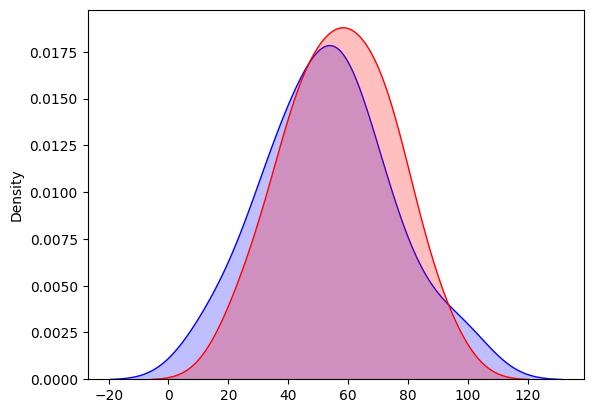

In [5]:
#Plot distibution
sns.kdeplot(a,fill=True,color='b')
sns.kdeplot(b,fill=True,color='r')


In [11]:
#Read in data 
df = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\StatsDatasets\\AB_Testing_Website.csv")
df.head(10)

,Group_A,Group_B
0,38,47
1,34,48
2,35,50
3,35,49
4,35,46
5,37,46
6,40,50
7,34,46
8,34,43
9,38,46


In [12]:
#Isolate group A and group B - old website vs new website 
group_A = df['Group_A']
group_B = df['Group_B']

In [42]:
#Run the t-test 
t_stat, p_val = sts.ttest_ind(group_A, group_B)

hypothtest(p_val)

#if p_val > 0.05: 
#    print("Accept the null hypothesis: there is no difference")
#else: 
#    print("Reject the null: Group A and B are significantly different")



Reject the null hypothesis


In [43]:
#Rerun but does new button lead to a greater difference 
t_stat, p_val = sts.ttest_ind(group_A, group_B, alternative='greater') #alternative='less'

hypothtest(p_val)


Accept the null hypothesis


### Example problem: One Sample T-Test
**Scenario: sample matches population**

Your org claims that the average age of its employees is 30 years old. You collect a sample of 10 employees age to check if the claim is true or not. We can use the hypothesis evaluation to test 

- $H_0$: $\mu_a$= X, there's no difference between sample and population 
- $H_A$: $\mu_a$ $\neq$ X, there's no difference between sample and population 

In [33]:
#define X, population mean 
pop_mean = 30 

In [31]:
#read in data 
df_ages = pd.read_csv('StatsDatasets/Ages.csv')
df_ages.shape #sample of 20, which is below 30, so we an use one-sample t-test (if above 30, use z-test)


(20, 1)

In [44]:
#evaluate 
t_stat, p_val = sts.ttest_1samp(df_ages,pop_mean)
print("tstat:", t_stat, "| pval:",p_val)
hypothtest(p_val)

tstat: [2.85505272] | pval: [0.01012962]
Reject the null hypothesis
